# Etivity 1: Exploratory Data Analysis and Data Preparation

### Student: Christos Koutsiaris

## Task 1: Exploratory Data Analysis (EDA)


### 1.1 Question

How are factors like housing and personal loans, marital status, and past credit defaults related to whether a client subscribes to a term deposit? Do these financial and personal circumstances affect their decision?

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns

# Load dataset
df = pd.read_csv('bank.csv')

# Display of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### 1.2 Calculate Statistics for Numerical and Categorical Attributes

In [236]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Statistics for numerical attributes
num_stats = df[numerical_cols].describe()
print("Numerical Attributes Statistics:")
print(num_stats)

# Statistics for categorical attributes (value counts)
cat_stats = {}
for col in categorical_cols:
    cat_stats[col] = df[col].value_counts(dropna=False)
    
print("\nCategorical Attributes Value Counts:")
for col, val_counts in cat_stats.items():
    print(f"\nColumn: {col}\n{val_counts}")

Numerical Attributes Statistics:
               age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000 

#### Conclusion

The numerical summary shows common banking details like the **average account balance, age range, and how often clients were contacted during a campaign** (shown in the "campaign" column). The mean, minimum, and maximum values help spot unusual data points. For example, a very high balance or age could be an outlier that needs extra attention.

The categorical data shows the most common **job types, education levels, and whether clients are married or single. It also includes how many people said "yes" or "no" to the term deposit offer**. A much lower number of "yes" responses compared to "no" responses might suggest an imbalance.

These details help us start identifying patterns for example, **whether people in certain jobs or age groups are more likely to subscribe.**

The counts for housing, personal loans, and credit defaults are especially useful to see how common these situations are and whether they affect the likelihood of subscribing.


### 1.3 Plotting Distributions of Relevant Categorical Attributes

Since the question focuses on categorical variables (`housing`, `loan`, `default`, `marital`), histograms and boxplots of *numerical* features aren't directly relevant.  Instead, I'll use countplots to visualize the distribution of *each* categorical variable, and then I will *combine* these in section 1.4 to analyze their relationship with `subscribed`.

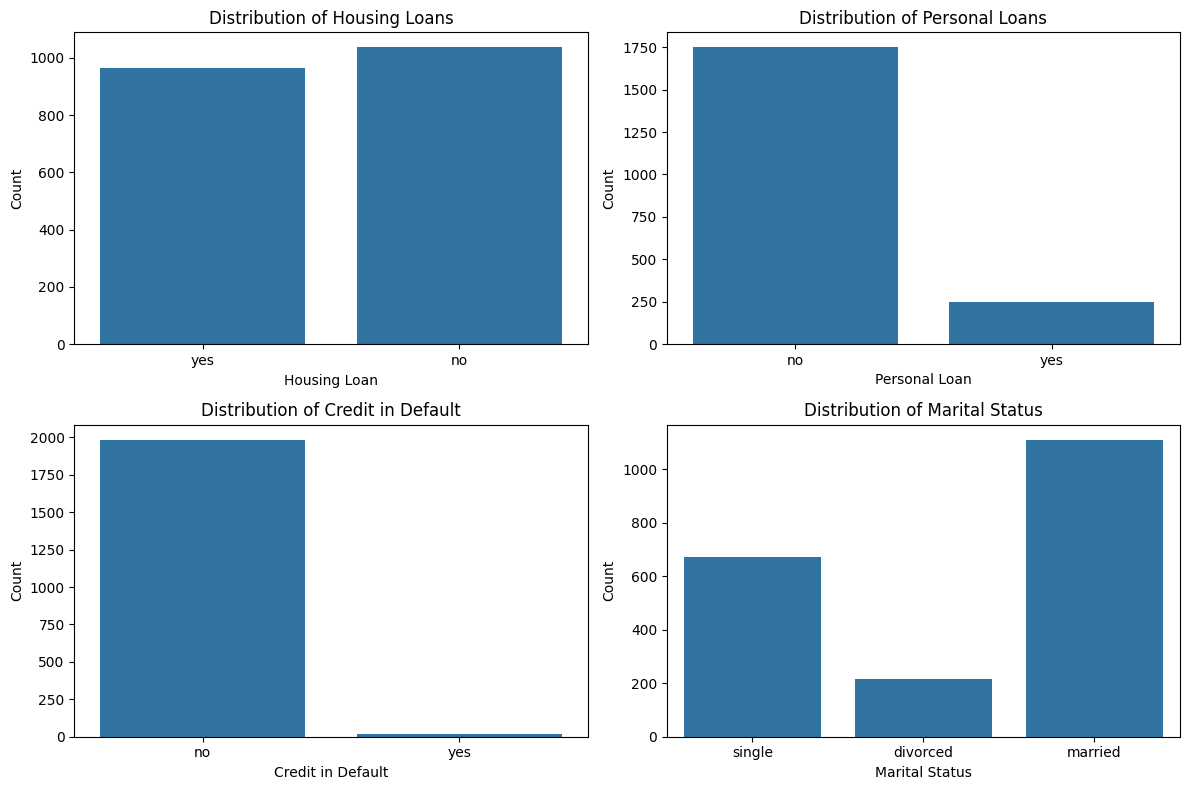

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplots for 'housing', 'loan', 'default', and 'marital'
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x='housing', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Housing Loans')
axes[0, 0].set_xlabel('Housing Loan')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='loan', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Personal Loans')
axes[0, 1].set_xlabel('Personal Loan')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='default', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Credit in Default')
axes[1, 0].set_xlabel('Credit in Default')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='marital', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Conclusion

These countplots show the distribution of each categorical variable:

*   **Housing Loan:**  A slight majority of clients do *not* have a housing loan.
*   **Personal Loan:**  A large majority of clients do *not* have a personal loan.
*   **Default:**  The vast majority of clients do *not* have credit in default.  This is a very imbalanced variable.
*   **Marital Status:**  Most clients are married, followed by single, and then divorced.

Understanding these individual distributions is the first step.  Next, I'll see how these factors relate to the target variable, `subscribed`.

### 1.4 Combined Distribution of Attributes (Financial Factors and Subscription)

The relationship between the categorical variables (housing, loan, default, marital) and the target variable (subscribed) is now examined. Grouped bar charts are used to visualize how subscription rates vary across these categories.

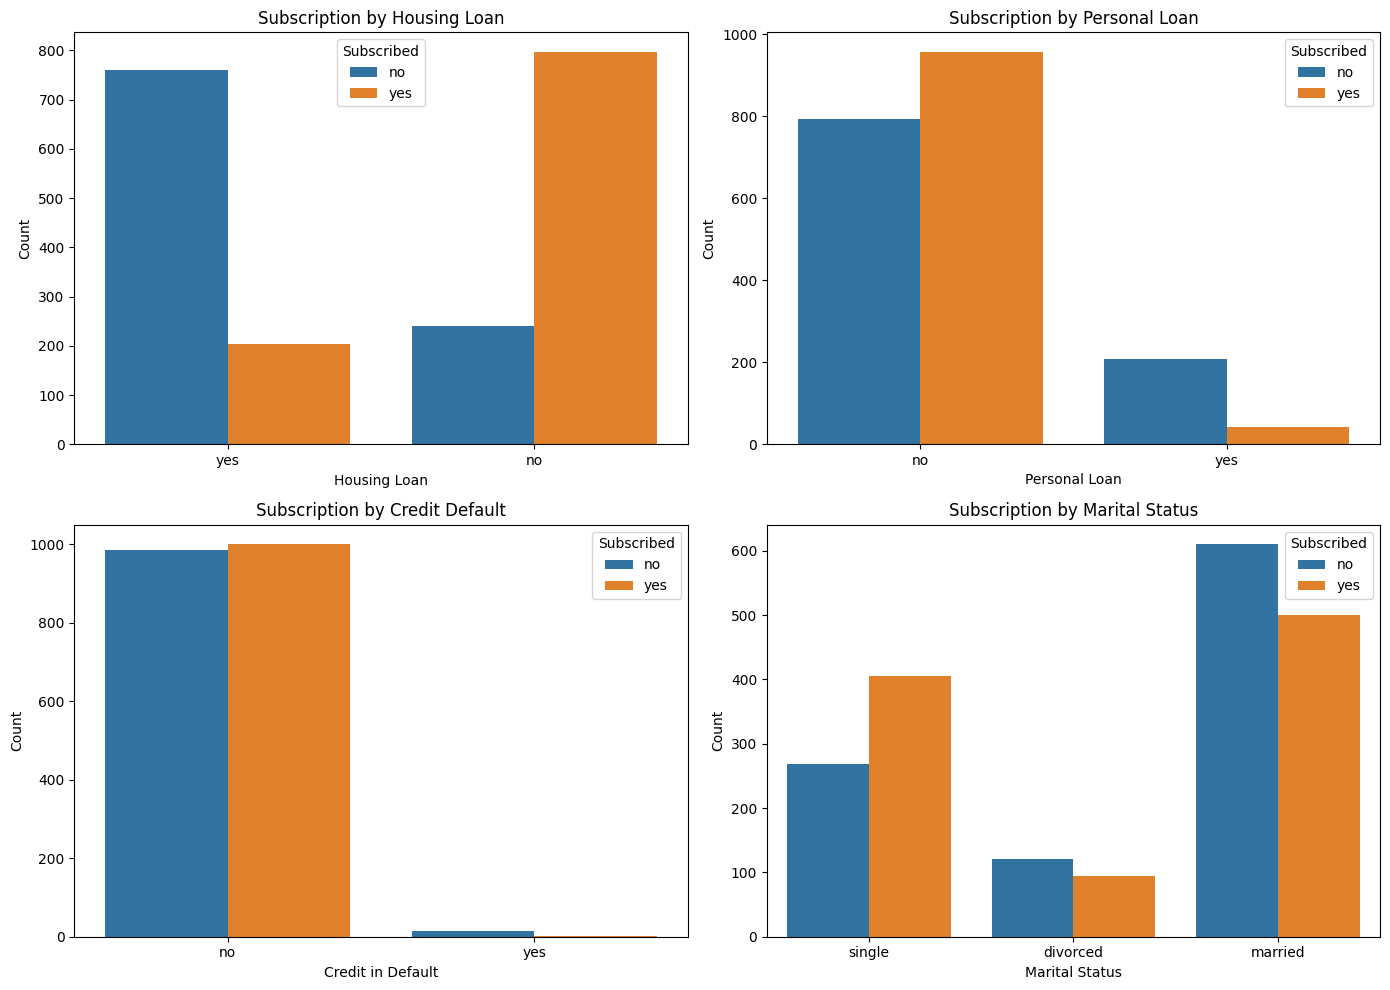

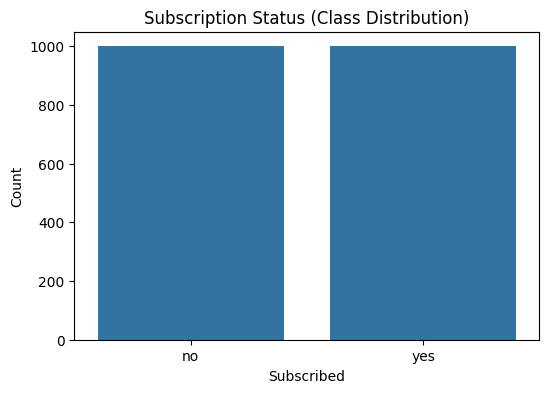

In [244]:
# Grouped Countplots (using seaborn)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='housing', hue='subscribed', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Subscription by Housing Loan')
axes[0, 0].set_xlabel('Housing Loan')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Subscribed')

sns.countplot(x='loan', hue='subscribed', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Subscription by Personal Loan')
axes[0, 1].set_xlabel('Personal Loan')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Subscribed')

sns.countplot(x='default', hue='subscribed', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Subscription by Credit Default')
axes[1, 0].set_xlabel('Credit in Default')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Subscribed')

sns.countplot(x='marital', hue='subscribed', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Subscription by Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Subscribed')

plt.tight_layout()
plt.show()


# Add a countplot to check class imbalance in 'subscribed'
plt.figure(figsize=(6,4))  # Keep it compact
sns.countplot(x='subscribed', data=df)
plt.title('Subscription Status (Class Distribution)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

### 1.5 Comparing Numerical Distributions Across Subscription Status

To gain deeper insights, let's examine how the distributions of key numerical features like 'balance', 'age', and 'duration' differ between clients who subscribed to the term deposit and those who did not. Boxplots are useful for this comparison, showing median, quartiles, and potential outliers for each group. This is based on feedback I received from Jay https://learn.ul.ie/d2l/le/49292/discussions/threads/77047/View

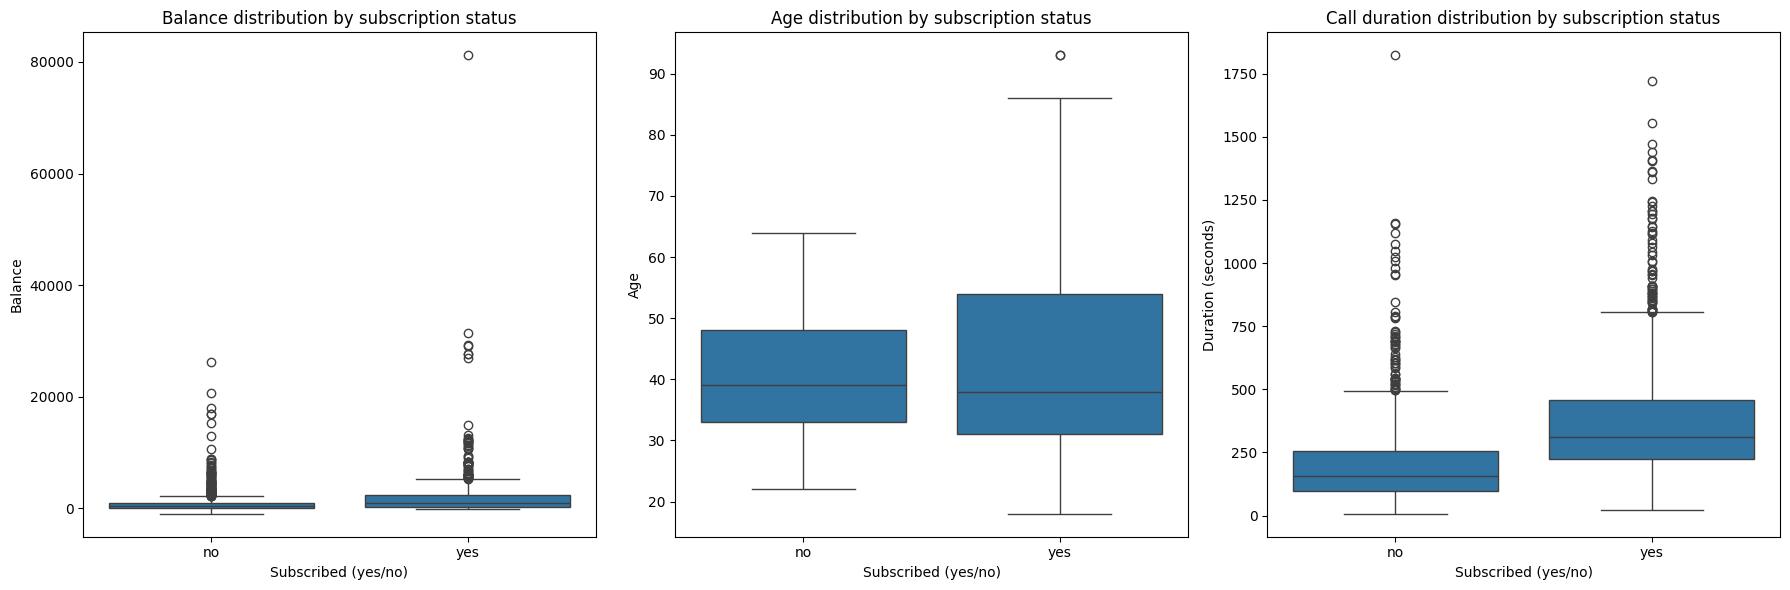

In [247]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='subscribed', y='balance', data=df, ax=axes[0])
axes[0].set_title('Balance distribution by subscription status')
axes[0].set_xlabel('Subscribed (yes/no)')
axes[0].set_ylabel('Balance')

sns.boxplot(x='subscribed', y='age', data=df, ax=axes[1])
axes[1].set_title('Age distribution by subscription status')
axes[1].set_xlabel('Subscribed (yes/no)')
axes[1].set_ylabel('Age')

sns.boxplot(x='subscribed', y='duration', data=df, ax=axes[2])
axes[2].set_title('Call duration distribution by subscription status')
axes[2].set_xlabel('Subscribed (yes/no)')
axes[2].set_ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

### 1.6 Overall EDA Conclusion

The exploratory data analysis aimed to understand how factors like housing/personal loans, marital status, and credit defaults relate to term deposit subscriptions.

**Key Findings Related to the Question:**
*   **Financial Obligations:** The grouped countplots clearly showed that clients *without* existing housing or personal loans have a notably higher propensity to subscribe. This suggests financial flexibility is a positive factor.
*   **Credit Default:** Having credit in default is strongly negatively associated with subscription, although this group is very small.
*   **Marital Status:** Single clients showed a slightly higher subscription rate compared to married or divorced individuals, indicating a potential minor influence of marital status.
*   **Call Duration:** The boxplots revealed a significant difference in call duration, with subscribers generally having much longer calls. While not part of the initial question, this is a highly insightful finding suggesting engagement during the call is crucial.
*   **Balance & Age:** The boxplots showed less pronounced differences in the central tendency (median) for balance and age between subscribers and non-subscribers, although subscribers might have slightly higher median balances and the age distributions look similar overall. Outliers are present in balance for both groups.

In conclusion, financial circumstances, particularly the absence of loans, appear significantly linked to a client's decision to subscribe. Call duration also emerges as a potentially strong indicator. Marital status seems less impactful. This initial exploration provides valuable insights for potential modeling and targeted marketing strategies.


## Task 2: Data Preparation

### 2.1 Handling Missing Values

In [252]:
# Check how many missing values exist in each column
print("Missing values per column before handling (Based on EDA value_counts):\\n", df.isnull().sum())

# Fill numerical columns with median
# Identify numerical columns with actual missing values based on initial EDA check if needed
numerical_cols_with_nan = ['age'] # Example if 'age' had NaNs; adjust based on EDA
for col in numerical_cols_with_nan:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
# Identify categorical columns with actual missing values based on initial EDA check
categorical_cols_with_nan = ['job', 'education', 'contact', 'poutcome']
for col in categorical_cols_with_nan:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values have been handled
print("\\nMissing values per column after handling:\\n", df.isnull().sum())

Missing values per column before handling (Based on EDA value_counts):\n age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64
\nMissing values per column after handling:\n age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


**Reason for Handling Missing Values:**

1. **Checking for Missing Data:**
During the initial data exploration (using value_counts(dropna=False)), we noticed some missing values (NaNs) in columns like job, education, contact, and possibly age and poutcome. We also ran isnull().sum() to confirm the missing values, but trusted the value counts more in case the missing data was represented in an unusual way.

2. **Filling in Numbers (Using Median):**
For any missing values in numeric columns (like age, if needed), we used the median to fill them in. This choice was based on the fact that the data had some extreme values and was a bit skewed (e.g., balance column). The median works better than the mean in such cases because it’s not affected as much by outliers.

3. **Filling in Categories (Using Mode):**
For columns with text categories (like job, education, contact, and poutcome), we used the mode, which is the most common value. This is a straightforward and widely used method that doesn’t add any new or artificial values. While more advanced techniques like subgroup imputation could be used, the amount of missing data was small, so using the mode kept things simple and effective.

4. **Why We Didn’t Delete Anything:**
Instead of removing rows or columns with missing data, we chose to fill them in. The amount of missing data wasn’t too high, so it made more sense to keep as much of the dataset as possible.

### 2.2 Encoding Categorical Attributes & Handling Cyclical Features

In [256]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Example: One-Hot Encoding using pd.get_dummies https://www.geeksforgeeks.org/ml-one-hot-encoding/
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Columns after encoding:\n", df_encoded.columns)
print("\nPreview of data after encoding:\n", df_encoded.head())

Columns after encoding:
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success', 'subscribed_yes'],
      dtype='object')

Preview of data after encoding:
     age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2            False   
1  39.0      688    1       233         2    133         1            False   
2  59.0     1035    1      

**Explanation**:  
1. Once categorical columns are identified, one-hot encoding (also called dummy encoding) is applied.
2. The parameter drop_first=True is used to prevent the “dummy variable trap,” which may lead to collinearity issues.
3. This process transforms each categorical column into multiple binary (0/1) columns, with one column for each category (excluding the first).


### 2.3 Treating Outliers and Skewed Distributions

Skewness before outlier treatment:\n age          0.860994
balance     11.461564
day          0.403661
duration     2.045787
campaign     2.320856
pdays        0.920006
previous     5.461168
dtype: float64
\nSkewness after Percentile capping:\n age         0.796856
balance     3.076602
day         0.401331
duration    1.680969
campaign    1.887345
pdays       0.483826
previous    1.921018
dtype: float64


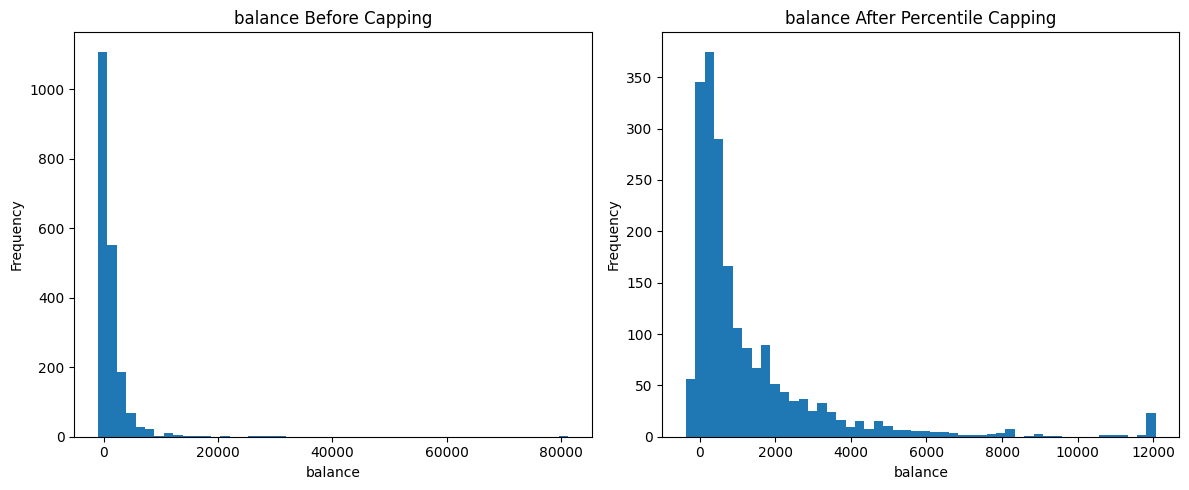

\nSkewness after scaling (applied to capped data):\n age         0.796856
balance     3.076602
day         0.401331
duration    1.680969
campaign    1.887345
pdays       0.483826
previous    1.921018
dtype: float64
\nPreview of data after capping and scaling:\n         age   balance       day  duration  campaign     pdays  previous  \
0 -0.775377 -0.454499 -1.324351  3.145128  0.081280 -0.281584 -0.174271   
1 -0.215740 -0.307476 -1.324351 -0.269523  0.081280 -0.265677 -0.540387   
2  1.383224 -0.135121 -1.324351 -0.774175  0.081280  0.577410 -0.540387   
3  0.423845 -0.451519 -1.324351 -0.076152 -0.685513  0.569457 -0.174271   
4  0.983483 -0.150519 -1.324351  0.890704 -0.685513  1.118259 -0.540387   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False             False          False  ...      False   
3  

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Treating Outliers (using Percentile Capping) ---
df_capped = df_encoded.copy() # Use df_encoded which includes cyclical features

# Ensure numerical_cols list is up-to-date after encoding
numerical_cols = df_capped.select_dtypes(include=np.number).columns
if 'subscribed_yes' in numerical_cols: # Exclude target variable if it's numerical/binary
     numerical_cols = numerical_cols.drop('subscribed_yes')

print("Skewness before outlier treatment:\\n", df_encoded[numerical_cols].skew())

# Capping outliers at the 1st and 99th percentiles
for col in numerical_cols:
    lower_bound = df_capped[col].quantile(0.01)
    upper_bound = df_capped[col].quantile(0.99)
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

print("\\nSkewness after Percentile capping:\\n", df_capped[numerical_cols].skew())

# Visualize effect of capping on 'balance'
column_name = 'balance'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_encoded[column_name], bins=50)
plt.title(f'{column_name} Before Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_capped[column_name], bins=50)
plt.title(f'{column_name} After Percentile Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# --- Scaling Numerical Features ---
df_scaled = df_capped.copy() # Start from the capped data
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("\\nSkewness after scaling (applied to capped data):\\n", df_scaled[numerical_cols].skew())

# Display head of final scaled data
print("\\nPreview of data after capping and scaling:\\n", df_scaled.head())



## Reason for Outlier Handling and Scaling

### Dealing with Outliers (Percentile Capping)
The data exploration showed that some numeric columns, like **balance** and **duration**, had outliers and were heavily skewed. Since extreme values can affect some models (like KNN, regression, etc.), we used **percentile capping** to reduce their impact. 

This means:
- Values below the **1st percentile** were set to the 1st percentile value.
- Values above the **99th percentile** were set to the 99th percentile value.

We chose this approach instead of removing outliers or using the IQR method because it’s **less aggressive** and helps keep more of the original data.  
Histograms for *balance* before and after capping showed a clear reduction in extreme values. Skewness also improved, especially for *balance* and *previous*.

### Scaling the Data (Using StandardScaler)
After handling outliers, we applied **StandardScaler** to all numeric columns (including sine and cosine-transformed *month* features). This scaler:
- Sets the mean to 0
- Scales the standard deviation to 1

This step is essential for models where feature scale matters, such as:
- SVM
- KNN
- PCA
- Logistic regression or neural networks (which use gradient descent)

Because we already capped outliers, StandardScaler was a suitable choice.  
If we had skipped outlier capping, we might have used **RobustScaler** instead, since it handles outliers better by using the median and IQR. I actually got feedback for this but i decided to keep the StandardScaler https://learn.ul.ie/d2l/le/49292/discussions/threads/77047/View


### 2.4 Treating Outliers and Skewed Distributions

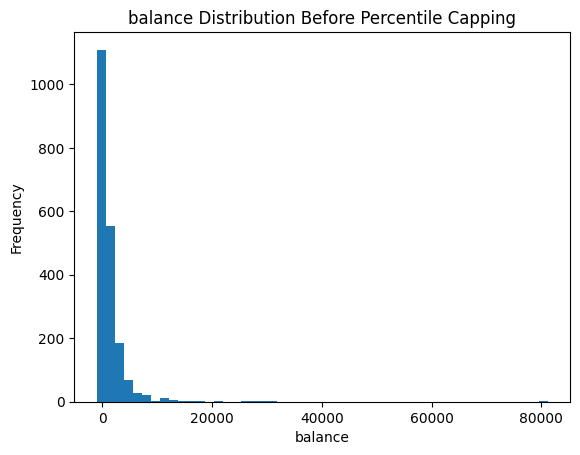

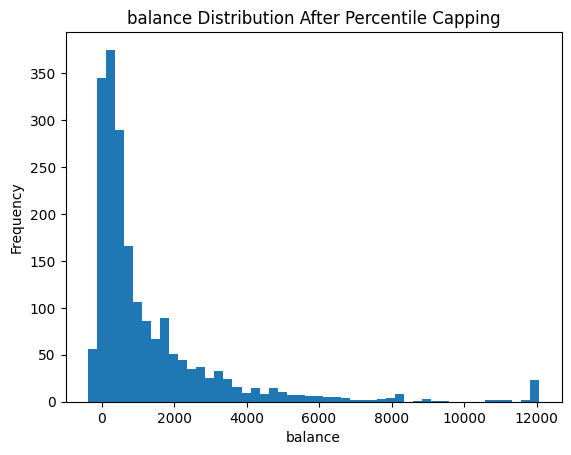

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Copy df_encoded to df_scaled
df_scaled = df_encoded.copy()

# Step 2: Identify numeric columns
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Capping outliers at the 1st and 99th percentiles
for col in numerical_cols:
    lower_bound = df_scaled[col].quantile(0.01)
    upper_bound = df_scaled[col].quantile(0.99)
    df_scaled[col] = np.where(df_scaled[col] < lower_bound, lower_bound, df_scaled[col])
    df_scaled[col] = np.where(df_scaled[col] > upper_bound, upper_bound, df_scaled[col])

# Step 4: Plot before and after for 'balance'
column_name = 'balance'

plt.hist(df_encoded[column_name], bins=50)
plt.title(f'{column_name} Distribution Before Percentile Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

plt.hist(df_scaled[column_name], bins=50)
plt.title(f'{column_name} Distribution After Percentile Capping')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


### 2.5 Creating a New Feature

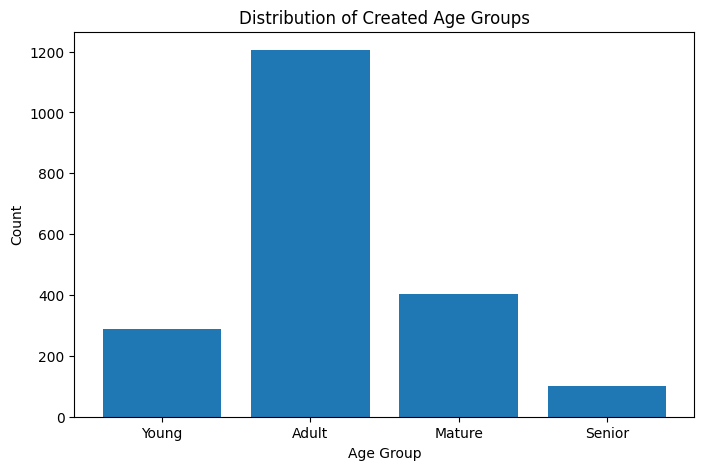

In [267]:
# Create a temporary age_group column in df using df['age']
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 30, 50, 65, 100],
                         labels=['Young','Adult','Mature','Senior'],
                         right=False)

# Plot the distribution
age_group_counts = df['age_group'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title("Distribution of Created Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Explanation of Data Preparation Choices

### 1. Purpose
A new feature called `age_group` was created by grouping the original `age` values into categories:
- 'Young'
- 'Adult'
- 'Mature'
- 'Senior'

### 2. Why This Is Useful

- **Non-Linear Patterns:**  
  The connection between age and subscribing to a term deposit might not be a straight line. For example, middle-aged or senior customers might be more likely to subscribe than younger ones. By turning age into categories, we help models (especially linear ones) better capture these patterns.

- **Business Relevance:**  
  Businesses often target specific age groups in marketing. Creating age groups makes the data more aligned with real-world strategies and makes the model results easier to interpret from a business point of view.

- **Interaction Effects:**  
  Age groups can also help us see how age interacts with other features. For example, do 'Young' clients with high balances behave differently than 'Senior' ones?

### 3. How It Was Done

- Used `pd.cut` on the *capped* age data (before scaling) to divide ages into meaningful life-stage bins.
- Then used `pd.get_dummies` to one-hot encode the new `age_group` column.
- This made the new feature ready for use in the final scaled dataset (`df_scaled`), so it could work well with models that expect numerical inputs.

A distribution plot showed that most clients in the dataset fall into the 'Adult' and 'Mature' categories.
